In [2]:
import numpy as np
import pandas as pd
import pandas
# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Regression
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import os
os.chdir('C:/Users/ASHISH/Desktop/SUPERVISED LEARNING-REGRESSION/30 Oct 18')

In [4]:
wine_data = pd.read_csv("White Wine.csv")

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [5]:
model1 = ols('quality ~ fixedacidity + volatileacidity + citricacid + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + density + pH + sulphates + alcohol', data=wine_data).fit()
print(model1.summary())
aov_table = sm.stats.anova_lm(model1)
print(aov_table)
variables = model1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            150.1928     18

[3067855.565999568,
 2.691435316241511,
 1.1411561788373252,
 1.1652150263986698,
 12.644063540716639,
 1.2368218629792984,
 1.7878802638105304,
 2.239233089356655,
 28.232546290998076,
 2.1963618410264236,
 1.1385404254272624,
 7.706956513505138]

In [6]:
model2 = ols('quality ~ fixedacidity + volatileacidity + citricacid + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + pH + sulphates + alcohol', data=wine_data).fit()
print(model2.summary())
aov_table = sm.stats.anova_lm(model2)
print(aov_table)
variables = model2.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     183.3
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:                -5574.7
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.0636      0

[1039.1298033945543,
 1.3561280336832522,
 1.1282984157196296,
 1.1598838169722814,
 1.435214987716072,
 1.2036453585304452,
 1.744627382558996,
 2.153170381271623,
 1.3309115916058147,
 1.056637416650311,
 1.6471174462531981]

In [7]:
model3 = ols('quality ~ fixedacidity + volatileacidity + residualsugar + chlorides + freesulfurdioxide + totalsulfurdioxide + pH + sulphates + alcohol', data=wine_data).fit()
print(model3.summary())
aov_table = sm.stats.anova_lm(model3)
print(aov_table)
variables = model3.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     203.7
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:                -5574.7
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4888   BIC:                         1.123e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.0615      0

[1038.6790861407658,
 1.2777165206694887,
 1.0965913830729164,
 1.4308137867432191,
 1.1863482998464339,
 1.7434078562922575,
 2.146635999607017,
 1.3273645121534476,
 1.0526519992266339,
 1.6380982803172344]

In [8]:
model4 = ols('quality ~ fixedacidity + volatileacidity + residualsugar + freesulfurdioxide + totalsulfurdioxide + pH + sulphates + alcohol', data=wine_data).fit()
print(model4.summary())
aov_table = sm.stats.anova_lm(model4)
print(aov_table)
variables = model4.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     228.6
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:                -5576.3
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4889   BIC:                         1.123e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.9039      0

[973.3525672339399,
 1.274207264231878,
 1.0854626664260676,
 1.4089095770496933,
 1.7433189049228963,
 2.141243979910274,
 1.3173871662682555,
 1.0524334395766066,
 1.4569576290409973]

In [9]:
model5 = ols('quality ~ fixedacidity + volatileacidity + residualsugar + freesulfurdioxide + pH + sulphates + alcohol', data=wine_data).fit()
print(model5.summary())
aov_table = sm.stats.anova_lm(model5)
print(aov_table)
variables = model5.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     260.2
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:22:58   Log-Likelihood:                -5579.3
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4890   BIC:                         1.123e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8921      0.33

[973.1531897797165,
 1.242182089631488,
 1.0306664576297502,
 1.3759446834928615,
 1.1475810937100563,
 1.2951969860227803,
 1.033552505554698,
 1.3033576391113257]

In [10]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [11]:
model16 = forward_selected(wine_data, 'quality')

In [12]:
print(model16.model.formula)

quality ~ alcohol + volatileacidity + residualsugar + freesulfurdioxide + density + pH + sulphates + fixedacidity + 1


In [13]:
print(model16.rsquared_adj)

0.28057667546860576


In [14]:
ConcreteX = wine_data[wine_data.columns.difference(['quality'])]
print(ConcreteX)

        alcohol  chlorides  citricacid  density  fixedacidity  \
0      8.800000      0.045        0.36  1.00100           7.0   
1      9.500000      0.049        0.34  0.99400           6.3   
2     10.100000      0.050        0.40  0.99510           8.1   
3      9.900000      0.058        0.32  0.99560           7.2   
4      9.900000      0.058        0.32  0.99560           7.2   
5     10.100000      0.050        0.40  0.99510           8.1   
6      9.600000      0.045        0.16  0.99490           6.2   
7      8.800000      0.045        0.36  1.00100           7.0   
8      9.500000      0.049        0.34  0.99400           6.3   
9     11.000000      0.044        0.43  0.99380           8.1   
10    12.000000      0.033        0.41  0.99080           8.1   
11     9.700000      0.035        0.40  0.99470           8.6   
12    10.800000      0.040        0.37  0.99200           7.9   
13    12.400000      0.044        0.40  0.99120           6.6   
14     9.700000      0.04

In [15]:
ConcreteX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
alcohol               4898 non-null float64
chlorides             4898 non-null float64
citricacid            4898 non-null float64
density               4898 non-null float64
fixedacidity          4898 non-null float64
freesulfurdioxide     4898 non-null float64
pH                    4898 non-null float64
residualsugar         4898 non-null float64
sulphates             4898 non-null float64
totalsulfurdioxide    4898 non-null float64
volatileacidity       4898 non-null float64
dtypes: float64(11)
memory usage: 421.0 KB


In [16]:
X=ConcreteX
y = wine_data.quality

In [17]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')

Add  alcohol                        with p-value 5.61477e-226
Add  volatileacidity                with p-value 1.77332e-70
Add  residualsugar                  with p-value 9.11385e-28


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  freesulfurdioxide              with p-value 1.76808e-09
Add  density                        with p-value 8.94502e-09
Add  pH                             with p-value 9.80885e-11
Add  sulphates                      with p-value 7.4207e-09
Add  fixedacidity                   with p-value 0.000864388
resulting features:


In [18]:
print(result)

['alcohol', 'volatileacidity', 'residualsugar', 'freesulfurdioxide', 'density', 'pH', 'sulphates', 'fixedacidity']


In [19]:
trainConcrete=wine_data.sample(frac=0.8,random_state=200)
testConcrete=wine_data.drop(trainConcrete.index)

In [20]:
trainConcreteX = trainConcrete[trainConcrete.columns.difference(['CompStrength'])]
X=trainConcreteX
y = trainConcrete.quality

In [21]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  quality                        with p-value 0.0
Add  residualsugar                  with p-value 4.18543e-147


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  pH                             with p-value 5.55939e-09
Add  freesulfurdioxide              with p-value 3.32198e-276
Add  totalsulfurdioxide             with p-value 0.0049334
Drop pH                             with p-value 0.626517
Drop residualsugar                  with p-value 0.0923041
Add  fixedacidity                   with p-value 9.46267e-13
resulting features:
['quality', 'freesulfurdioxide', 'totalsulfurdioxide', 'fixedacidity']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


In [26]:
columns = ['alcohol', 'volatileacidity', 'residualsugar', 'freesulfurdioxide', 'density', 'pH', 'sulphates', 'fixedacidity']

In [27]:
testConcreteX = pd.DataFrame(testConcrete, columns=columns) 

In [28]:
testConcreteX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 2 to 4888
Data columns (total 8 columns):
alcohol              980 non-null float64
volatileacidity      980 non-null float64
residualsugar        980 non-null float64
freesulfurdioxide    980 non-null float64
density              980 non-null float64
pH                   980 non-null float64
sulphates            980 non-null float64
fixedacidity         980 non-null float64
dtypes: float64(8)
memory usage: 68.9 KB


In [30]:
modeltrain = model23 = ols('quality ~ alcohol+volatileacidity+residualsugar+freesulfurdioxide+ density+pH+ sulphates+fixedacidity', data=wine_data).fit()

In [31]:
modeltrain.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:29:44   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           154.1062     18.100      8.514      0.000     118.622     189.591
alcohol               0.1932      0.024      8.021      0.000       0.146       0.240
volatileacidity      -1.8881      0.110    -17.242      0.000      -2.103      -1.673
residualsugar         0.0828      0.007     11.370      0.000       0.069       0.097
freesulfurdioxide     0.0033      0.001      4.950      0.000       0.002       0.005
density            -154.2913     18.344     -8.411      0.000    -190.254    -118.329
pH                    0.6942      0.103      6.717      0.000       0.492       0.897
sulphates             0.6285      0.100      6.287      0.000       0.433       0.824
fixedacidity          0.0681      0.020      3.333      0.001       0.028       0.108
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
from statsmodels.stats.api import anova_lm
aov_table = sm.stats.anova_lm(modeltrain)
print(aov_table)

                       df       sum_sq     mean_sq            F         PR(>F)
alcohol               1.0   728.733066  728.733066  1291.430126  3.549059e-251
volatileacidity       1.0   193.992462  193.992462   343.785291   3.184537e-74
residualsugar         1.0    70.270806   70.270806   124.530970   1.423717e-28
freesulfurdioxide     1.0    21.002774   21.002774    37.220234   1.136438e-09
density               1.0    19.041106   19.041106    33.743848   6.684567e-09
pH                    1.0    23.931481   23.931481    42.410365   8.142998e-11
sulphates             1.0    18.964763   18.964763    33.608556   7.162612e-09
fixedacidity          1.0     6.269959    6.269959    11.111358   8.643880e-04
Residual           4889.0  2758.783375    0.564284          NaN            NaN


In [33]:
testpred =  modeltrain.predict(testConcreteX) # predict out of sample
print(testpred)

2       5.756702
17      5.883260
18      5.787451
19      5.486524
37      5.857924
39      5.628108
40      5.428134
48      5.477955
57      5.727937
63      5.444495
65      5.123771
67      5.741049
76      6.701073
77      6.244270
80      6.072869
106     6.101655
111     5.655996
112     5.489401
118     5.489401
124     5.730476
137     5.170398
139     6.092124
140     5.565697
141     5.170398
142     6.071471
145     5.876597
146     5.913436
153     5.923493
155     5.499812
159     6.111047
          ...   
4768    5.893868
4770    5.893868
4777    6.515055
4778    6.124006
4782    5.398365
4786    6.762245
4788    6.056526
4790    6.126704
4791    5.398365
4795    6.228068
4804    6.118694
4805    5.415923
4808    5.639267
4810    5.103242
4816    5.765706
4817    6.043125
4818    6.979901
4821    5.900050
4823    6.257425
4826    5.855159
4831    5.189393
4835    5.978160
4842    6.143868
4843    5.980898
4848    5.974541
4864    5.193871
4874    5.849642
4878    4.8173

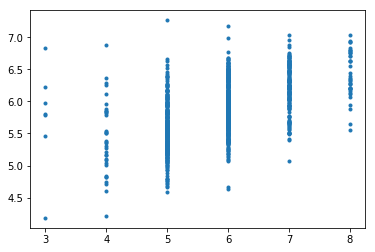

In [35]:
plt.plot(testConcrete.quality, testpred, '.')
plt.show()

In [36]:
np.mean(np.square(testConcrete.quality - testpred))

0.5973130206905072